<a href="https://colab.research.google.com/github/oussamatouihri/oussamagit/blob/main/Stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Downloading and importing libraries

In [ ]:
!pip install matplotlib

In [ ]:
!pip install clean-text
!pip install emoji
!pip install Unidecode
!pip install --upgrade pandas
!pip install fuzzywuzzy
!pip install spacy
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=663035275c601c25850b2831e6143667d6cdf1ff64fadd28da3dc9538863a3cc
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [ ]:
import pandas as pd
import spacy
import emoji
import re
import matplotlib.pyplot as plt
import numpy as np
import re
from cleantext import clean
from collections import Counter
from unidecode import unidecode
from fuzzywuzzy import fuzz
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Data understanding

In [ ]:
My_data = pd.read_csv("data stage.csv")
My_data

,id_cli,Date début d'activité,Capital,Date d'immatriculation,Objet de l'activité principale_fr,Amplitude,Objet de l'activité principale_ar,nantissement,pasdenantissement,leasing,pasdeleasing
0,1,1/18/2006,700000,2/1/2006,NaN,NaN,NaN,0,1,0,1
1,2,4/1/2002,800000,4/6/2002,NaN,AUTRES INTERMED SPEC DU CCE,NaN,1,0,0,1
2,3,7/1/1994,100000,NaN,NaN,FAB DE MACHINES ET EQUIPEMENTS,NaN,1,0,1,0
3,4,2/10/1983,15150000,10/21/1997,Industrie pharmaceutique,INDUSTRIE CHIMIQUE,NaN,1,0,0,1
4,5,2/7/2001,27400000,2/8/2001,NaN,AUTRES INTERMED SPEC DU CCE,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6689,6690,6/24/2010,10000,6/24/2010,METALLURGIE,NaN,صناعة المعادن,0,1,0,1
6690,6691,10/4/2010,2000,10/22/2010,Travaux de construction,NaN,أشغال البناء,0,1,0,1
6691,6692,2/24/2009,46500.02,2/25/2009,NaN,NaN,NaN,1,0,1,0
6692,6693,1/24/2007,170000,1/25/2007,NaN,AUTRES INTERMED SPEC DU CCE,NaN,1,0,0,1


In [ ]:
print(len(My_data))

6694


In [ ]:
My_data.isna().sum()

id_cli                                  0
Date début d'activité                  50
Capital                                32
Date d'immatriculation                368
Objet de l'activité principale_fr    2321
Amplitude                            3071
Objet de l'activité principale_ar    2364
nantissement                            0
pasdenantissement                       0
leasing                                 0
pasdeleasing                            0
dtype: int64

In [ ]:
My_data["Objet de l'activité principale_fr"].value_counts()
My_data["Amplitude"].value_counts()

Amplitude
AUTRES INTERMED SPEC DU CCE       521
SCES FOURNIS PRINCIP AUX ESE      332
INDUSTRIES ALIMENTAIRES           256
CCE DE DETAIL ET REP ART DOMES    223
CCE DE GROS ET INTERMED DU CCE    213
ACTIVITES IMMOBILIERES            178
ACTIVITES INFORMATIQUES           177
CONSTRUCTION                      172
AGRICUL CHASSE SCES ANNEXES       138
HOTELS ET RESTAURANTS             104
INDUSTRIE TEXTILE                  97
SERVICES PERSONNELS                83
FAB DE MEUBLES INDUSS DIVERSES     77
SANTE ET ACTION SOCIALE            75
SCES AUXILIAIRES DES TRANSPORT     70
INDUSTRIE CHIMIQUE                 65
CCE ET REPARATION AUTOMOBILE       59
TRANSPORTS TERRESTRES              58
FAB AUTRES PDT MINER NON METAL     55
INDUSTRIE CAOUTCH ET PLASTIQUE     49
POSTES ET TELECOMMUNICATIONS       46
EDUCATION                          44
TRAVAIL DES METAUX                 43
METALLURGIE                        41
ACT RECREATIVE CULTUR ET SPORT     36
INDUSTRIE  PAPIER ET CARTON        31
FA

In [ ]:
# Define the column names for the selected columns
column_names = ["Objet de l'activité principale_fr", "Amplitude"]

# Step 1: Find rows with null values in the selected columns
rows_to_delete = My_data[My_data[column_names].isnull().any(axis=1)]

# Step 2: Delete the identified rows
My_data1 = My_data.drop(rows_to_delete.index)
#reseting the index
My_data1.reset_index(drop=True, inplace=True)
My_data1.index += 1



# Print the original and updated data
My_data1.head(10)



,id_cli,Date début d'activité,Capital,Date d'immatriculation,Objet de l'activité principale_fr,Amplitude,Objet de l'activité principale_ar,nantissement,pasdenantissement,leasing,pasdeleasing
1,4,2/10/1983,15150000,10/21/1997,Industrie pharmaceutique,INDUSTRIE CHIMIQUE,NaN,1,0,0,1
2,43,5/12/1986,32000000,NaN,Hôtels,HOTELS ET RESTAURANTS,NaN,1,0,0,1
3,48,4/24/2007,150000,4/26/2007,Intermédiaires du commerce de gros,AUTRES INTERMED SPEC DU CCE,وسطاء تجارة الجملة,0,1,0,1
4,60,11/2/2010,5900,11/9/2010,Pâtisserie (exclusive),INDUSTRIES ALIMENTAIRES,مصانع المرطبات (فقط),0,1,0,1
5,67,10/27/2010,10000,10/30/2010,Tissage,INDUSTRIE TEXTILE,النسيج,0,1,0,1
6,68,10/10/2010,10000,11/8/2010,Travaux installation électrique,CONSTRUCTION,أشغال تركيب الكهرباء,0,1,0,1
7,69,11/5/2010,1000,11/8/2010,SERVICES FOURNIS PRINCIPALEMENT AUX ENTREPRISES,SCES FOURNIS PRINCIP AUX ESE,الخدمات المقدمة خصوصا للمؤسسات,0,1,0,1
8,70,11/22/2010,10000,11/22/2010,METALLURGIE,METALLURGIE,صناعة المعادن,0,1,0,1
9,72,9/22/2010,9500,9/27/2010,ACTIVITES INFORMATIQUES,ACTIVITES INFORMATIQUES,الأنشطة الإعلامية,0,1,0,1
10,81,8/28/2009,4500,9/2/2009,Commerce d'équipements automobiles,CCE ET REPARATION AUTOMOBILE,تجارة قطع الغيار و لوازم السيّارات,0,1,0,1


In [ ]:
print(len(My_data1))

2404


In [ ]:
My_data1.isna().sum()

id_cli                                0
Date début d'activité                 1
Capital                               4
Date d'immatriculation               26
Objet de l'activité principale_fr     0
Amplitude                             0
Objet de l'activité principale_ar    44
nantissement                          0
pasdenantissement                     0
leasing                               0
pasdeleasing                          0
dtype: int64

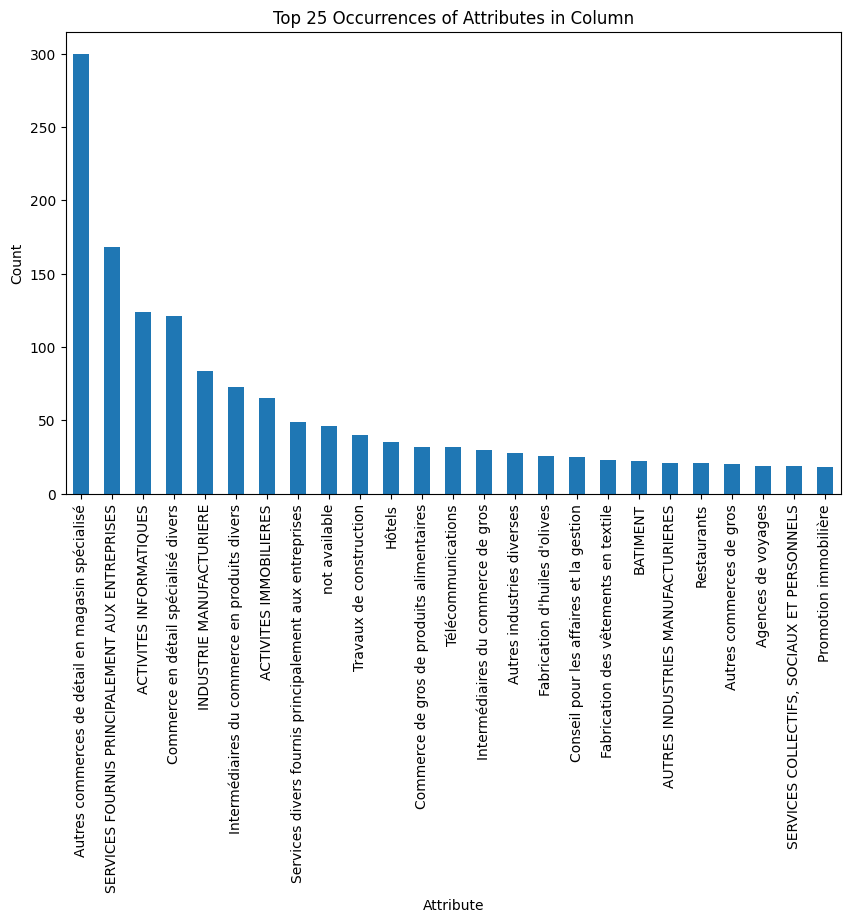

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named My_data and the column you want to plot is named "Objet de l'activité principale_fr"
# Replace "Objet de l'activité principale_fr" with the actual name of your column

# Count the occurrences of each unique value in the column and get the top 25 highest occurrences
top_25_value_counts = My_data1["Objet de l'activité principale_fr"].value_counts().nlargest(25)

# Plot the bar graph
top_25_value_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Top 25 Occurrences of Attributes in Column')

# Show the plot
plt.show()


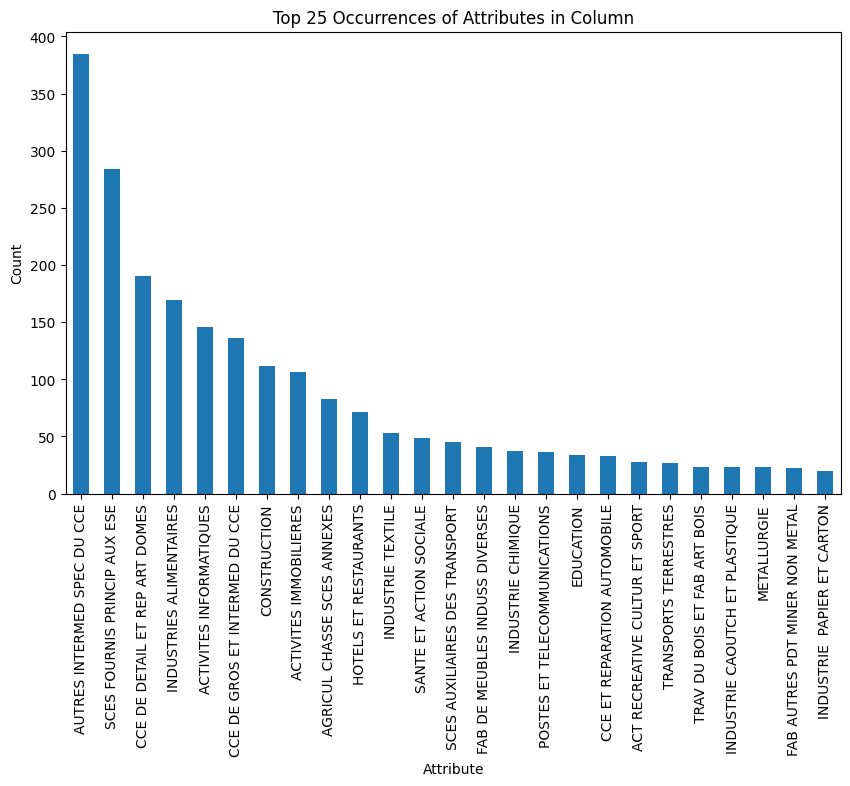

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named My_data and the column you want to plot is named "Objet de l'activité principale_fr"
# Replace "Objet de l'activité principale_fr" with the actual name of your column

# Count the occurrences of each unique value in the column and get the top 25 highest occurrences
top_25_value_counts = My_data1["Amplitude"].value_counts().nlargest(25)

# Plot the bar graph
top_25_value_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Top 25 Occurrences of Attributes in Column')

# Show the plot
plt.show()


In [ ]:
# Define the column names
column1 = "Objet de l'activité principale_fr"
column2 = "Amplitude"

# Remove accents and convert text to lowercase for column1
My_data1[column1] = My_data1[column1].apply(lambda x: unidecode(x).lower())

# Remove accents and convert text to lowercase for column2
My_data1[column2] = My_data1[column2].apply(lambda x: unidecode(x).lower())

# Remove white spaces from column1
My_data1[column1] = My_data1[column1].str.replace(r"\s", "")

# Remove white spaces from column2
My_data1[column2] = My_data1[column2].str.replace(r"\s", "")


# Print the updated DataFrame
My_data1


,id_cli,Date début d'activité,Capital,Date d'immatriculation,Objet de l'activité principale_fr,Amplitude,Objet de l'activité principale_ar,nantissement,pasdenantissement,leasing,pasdeleasing
1,4,2/10/1983,15150000,10/21/1997,industrie pharmaceutique,industrie chimique,NaN,1,0,0,1
2,43,5/12/1986,32000000,NaN,hotels,hotels et restaurants,NaN,1,0,0,1
3,48,4/24/2007,150000,4/26/2007,intermediaires du commerce de gros,autres intermed spec du cce,وسطاء تجارة الجملة,0,1,0,1
4,60,11/2/2010,5900,11/9/2010,patisserie (exclusive),industries alimentaires,مصانع المرطبات (فقط),0,1,0,1
5,67,10/27/2010,10000,10/30/2010,tissage,industrie textile,النسيج,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2400,6682,5/25/2010,5000,5/31/2010,fabrication de machines diverses d'usage speci...,fab de machines et equipements,صنع آلات متنوعة ذات الإستعمال المختصّ,1,0,0,1
2401,6683,10/28/2010,10000,10/29/2010,fabrication des vetements en textile,industrie textile,صنع الملابس من النسيج,0,1,0,1
2402,6684,8/18/2010,1000,10/11/2010,services divers fournis principalement aux ent...,sces fournis princip aux ese,خدمات متنوعة مقدمة خصوصا للمؤسسات,0,1,0,1
2403,6685,10/8/2010,150000,10/8/2010,intermediaires du commerce en produits divers,autres intermed spec du cce,وسطاء تجارةمواد متنوعة,0,1,0,1


##Fuzzywuzzy betxeen the 2 column in My_data1


In [ ]:
column1="Objet de l'activité principale_fr"
column2="Amplitude"
# Retrieve the columns
column1 = My_data1["Objet de l'activité principale_fr"].astype(str)
column2 = My_data1["Amplitude"].astype(str)

# Step 3: Perform string comparison and print the results
similarity_sum = 0
print("Row Num | Column1 | Column2 | String Similarity")
print("-" * 45)
for i, (val1, val2) in enumerate(zip(column1, column2), start=1):
    similarity_ratio = fuzz.ratio(val1, val2)
    similarity_sum += similarity_ratio
    print(f"{i:7} | {val1:<40} | {val2:<40} | {similarity_ratio}")
print("-" * 45)
print("Average Similarity:", similarity_sum / len(My_data1))


Row Num | Column1 | Column2 | String Similarity
---------------------------------------------
      1 | industrie pharmaceutique                 | industrie chimique                       | 76
      2 | hotels                                   | hotels et restaurants                    | 44
      3 | intermediaires du commerce de gros       | autres intermed spec du cce              | 52
      4 | patisserie (exclusive)                   | industries alimentaires                  | 31
      5 | tissage                                  | industrie textile                        | 25
      6 | travaux installation electrique          | construction                             | 33
      7 | services fournis principalement aux entreprises | sces fournis princip aux ese             | 75
      8 | metallurgie                              | metallurgie                              | 100
      9 | activites informatiques                  | activites informatiques                  | 100
     1

##NER model

In [ ]:
# Load the French model
nlp = spacy.load("fr_core_news_sm")

# Define the column names
column1 = "Objet de l'activité principale_fr"
column2 = "Amplitude"

# Get the last 10 rows of the DataFrame
last_10_rows = My_data1.tail(10)

# Define the placeholder for NaN values
placeholder = "NaN_value"

# Extract named entities from column1 and column2
entities_column1 = []
entities_column2 = []
for _, row in last_10_rows.iterrows():
    value1 = row[column1]
    value2 = row[column2]

    if isinstance(value1, str):
        doc1 = nlp(value1)
        entities_column1.append([(ent.text, ent.label_) for ent in doc1.ents])
    else:
        entities_column1.append([])

    if isinstance(value2, str):
        doc2 = nlp(value2)
        entities_column2.append([(ent.text, ent.label_) for ent in doc2.ents])
    else:
        entities_column2.append([])

    # Replace NaN values with the placeholder and print a message
    if pd.isnull(value1):
        row[column1] = placeholder
        print(f"NaN value replaced in '{column1}' column in row {_ + 1}")
    if pd.isnull(value2):
        row[column2] = placeholder
        print(f"NaN value replaced in '{column2}' column in row {_ + 1}")

# Print the extracted entities for column1
print("Entities for", column1)
for i, row_entities in enumerate(entities_column1, start=1):
    print(f"Row {i} Entities:")
    for entity in row_entities:
        print(entity)
    print()

# Print the extracted entities for column2
print("Entities for", column2)
for i, row_entities in enumerate(entities_column2, start=1):
    print(f"Row {i} Entities:")
    for entity in row_entities:
        print(entity)
    print()


Entities for Objet de l'activité principale_fr
Row 1 Entities:

Row 2 Entities:

Row 3 Entities:

Row 4 Entities:

Row 5 Entities:

Row 6 Entities:

Row 7 Entities:

Row 8 Entities:

Row 9 Entities:

Row 10 Entities:

Entities for Amplitude
Row 1 Entities:

Row 2 Entities:
('sces fournis', 'MISC')

Row 3 Entities:

Row 4 Entities:

Row 5 Entities:
('sces fournis', 'MISC')

Row 6 Entities:

Row 7 Entities:

Row 8 Entities:
('sces fournis', 'MISC')

Row 9 Entities:

Row 10 Entities:



##Multinomial Naive Bayes algorithm


In [ ]:


# Load the data
#My_data1 = pd.read_csv("data stage.csv")

# Extract the scraped data and original data
scraped_data = My_data1["Objet de l'activité principale_fr"].astype(str)
original_data = My_data1["Amplitude"].astype(str)

# Define the placeholder for NaN values
placeholder = "NaN_value"

# Replace NaN values with the placeholder in scraped_data and original_data
scraped_data = scraped_data.fillna(placeholder)
original_data = original_data.fillna(placeholder)

# Step 1: Data Preprocessing (if needed)

# Step 2: Labeling Data (if necessary)

# Step 3: Train a Classification Model
X = scraped_data
y = original_data

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Extraction
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the Model
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Step 7: Evaluate the Model
y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 8: Apply the Model
# Now, use the trained model to predict the classes for the original data
X_original = original_data
X_original_vec = vectorizer.transform(X_original)
predicted_classes = classifier.predict(X_original_vec)

# Compare the predicted classes with the original data to assess the reliability.

# Additional steps can include hyperparameter tuning, using different classification algorithms,
# or employing more advanced feature extraction techniques (e.g., TF-IDF, word embeddings).

# Note: This is a basic example, and you may need to customize the code based on your specific data and requirements.


Accuracy: 0.7234927234927235


In [ ]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")


Number of training samples: 1923
Number of testing samples: 481


In [ ]:
class_distribution = y.value_counts()
print("Class distribution in original data:")
print(class_distribution)


Class distribution in original data:
Amplitude
autres intermed spec du cce       385
sces fournis princip aux ese      284
cce de detail et rep art domes    190
industries alimentaires           169
activites informatiques           146
cce de gros et intermed du cce    136
construction                      112
activites immobilieres            106
agricul chasse sces annexes        83
hotels et restaurants              71
industrie textile                  53
sante et action sociale            49
sces auxiliaires des transport     45
fab de meubles induss diverses     41
industrie chimique                 37
postes et telecommunications       36
education                          34
cce et reparation automobile       33
act recreative cultur et sport     28
transports terrestres              27
trav du bois et fab art bois       23
industrie caoutch et plastique     23
metallurgie                        23
fab autres pdt miner non metal     22
industrie  papier et carton        20
ind

In [ ]:
predicted_class_distribution = pd.Series(predicted_classes).value_counts()
print("Predicted class distribution:")
print(predicted_class_distribution)


Predicted class distribution:
autres intermed spec du cce       576
industries alimentaires           346
sces fournis princip aux ese      314
cce de detail et rep art domes    240
activites informatiques           209
activites immobilieres            119
construction                      112
agricul chasse sces annexes        83
hotels et restaurants              71
sces auxiliaires des transport     60
industrie textile                  53
sante et action sociale            49
fab de meubles induss diverses     41
transports terrestres              27
trav du bois et fab art bois       23
metallurgie                        23
industrie  papier et carton        20
intermediation financiere          14
peche pisciculture et aquacult     13
edition imprimerie reproduct       11
Name: count, dtype: int64


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.72


In [ ]:
misclassified_samples = X_test[y_test != y_pred]
misclassified_labels = y_test[y_test != y_pred]
misclassified_predictions = y_pred[y_test != y_pred]

print("Misclassified examples:")
for i in range(min(5, len(misclassified_samples))):
    print(f"Sample: {misclassified_samples.iloc[i]}")
    print(f"True label: {misclassified_labels.iloc[i]}")
    print(f"Predicted label: {misclassified_predictions[i]}\n")


Misclassified examples:
Sample: fabrication de produits laitiers et de fromages
True label: industries alimentaires
Predicted label: industrie chimique

Sample: autres commerces de detail en magasin specialise
True label: activites informatiques
Predicted label: autres intermed spec du cce

Sample: intermediaires du commerce de gros
True label: cce de gros et intermed du cce
Predicted label: autres intermed spec du cce

Sample: activites juridiques
True label: sces fournis princip aux ese
Predicted label: activites informatiques

Sample: education
True label: education
Predicted label: activites informatiques



Confusion Matrix:
[[ 2  0  2 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]


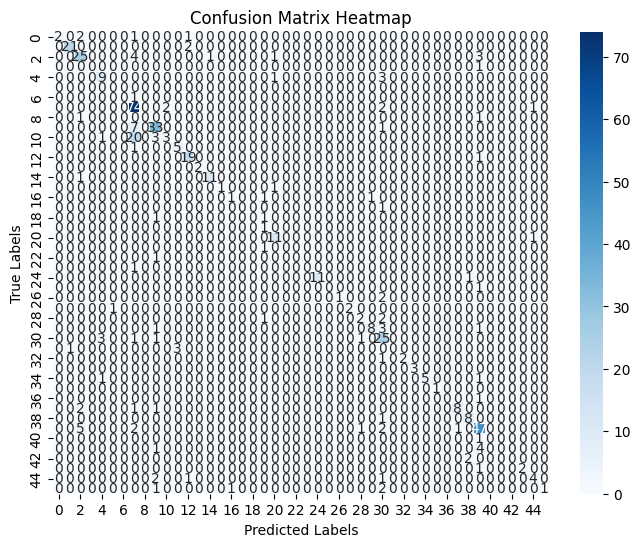

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
                                precision    recall  f1-score   support

act recreative cultur et sport       1.00      0.33      0.50         6
        activites immobilieres       0.95      0.91      0.93        23
       activites informatiques       0.69      0.74      0.71        34
       administration publique       0.00      0.00      0.00         1
   agricul chasse sces annexes       0.64      0.69      0.67        13
 assain voirie et gest dechets       0.00      0.00      0.00         0
                     assurance       0.00      0.00      0.00         1
   autres intermed spec du cce       0.65      0.94      0.77        79
  auxili financiers et d'assur       0.00      0.00      0.00         2
cce de detail et rep art domes       0.73      0.80      0.77        41
cce de gros et intermed du cce       0.60      0.11      0.19        27
  cce et reparation automobile       0.62      0.83      0.71         6
                  construction       0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

##Creating the data set from the website

In [ ]:

# Read the data from the txt file
with open("websitedata.txt", "r") as file:
    data = file.readlines()

# Function to extract the level, code, and text from each line
def extract_level_code_text(line):
    parts = line.split(' : ', 1)
    if len(parts[0]) == 2 and parts[0].isalpha():
      level = 1
    elif len(parts[0]) == 2 and parts[0].replace('.', '', 1).isdigit():
      level = 2
    elif len(parts[0]) == 3:
      level = 3
    elif len(parts[0]) == 4:
      level = 4
    elif len(parts[0]) == 5:
      level = 5
    else:
      level = 0  # Set a default level if none of the conditions are met


    code = parts[0].strip()
    text = parts[1].strip()

    return level, code, text

# Process the data and create a new DataFrame
levels, codes, texts = zip(*[extract_level_code_text(line) for line in data])
web_data = pd.DataFrame({"Level": levels, "Code": codes, "Category": texts})

# Print the DataFrame
web_data
print(len(web_data))


1426


In [ ]:

# Assuming you have a DataFrame named web_data

# Drop duplicates based on a specific column (e.g., 'column_name')
del_web_data1 = web_data.drop_duplicates(subset=['Category'], keep='first')
web_data1 = del_web_data1.reset_index(drop=True)

# 'keep' parameter determines which duplicate to keep (e.g., 'first', 'last', or 'False')
# 'first': Keeps the first occurrence and removes the subsequent occurrences
# 'last': Keeps the last occurrence and removes the previous occurrences
# 'False': Removes all occurrences of duplicates (keeps none)

# Example with 'keep' parameter set to 'last':
# web_data = web_data.drop_duplicates(subset=['column_name'], keep='last')

# Note: This operation modifies the DataFrame 'web_data' in-place. If you want to keep the original DataFrame unchanged, you can assign the result to a new DataFrame, like 'web_data_cleaned'.

print(len(web_data1))
web_data1


849


,Level,Code,Category
0,0,A,"AGRICULTURE, CHASSE, SYLVICULTURE"
1,2,01,"AGRICULTURE, CHASSE, SERVICES ANNEXES"
2,3,011,Culture
3,4,0111,Culture de céréales; cultures industrielles
4,5,01111,Culture de céréales
...,...,...,...
844,4,9305,Autres services personnels
845,0,P,SERVICES DOMESTIQUES
846,3,950,Services domestiques
847,0,Q,ORGANISMES EXTRA-TERRITORIAUX


In [ ]:
web_data1.head(25)

,Level,Code,Category
0,0,A,"AGRICULTURE, CHASSE, SYLVICULTURE"
1,2,01,"AGRICULTURE, CHASSE, SERVICES ANNEXES"
2,3,011,Culture
3,4,0111,Culture de céréales; cultures industrielles
4,5,01111,Culture de céréales
5,5,01112,culture de fourrages
6,5,01113,Culture de légumineuses et cultures industrielles
7,4,0112,Culture de légumes; horticulture; pépinières
8,5,01121,Culture de légumes; maraîchage
9,5,01122,Horticulture; pépinières


## FuzzuWuzzy between the 2 datasets


In [ ]:
# Assuming you have a DataFrame named My_data1 and the column you want to compare is named "Objet de l'activité principale_fr"
# Replace "Objet de l'activité principale_fr" with the actual name of your column

# Assuming you have a DataFrame named web_data and the column you want to compare is named "Category"
# Replace "Category" with the actual name of your column

# Function to calculate similarity between two strings
def calculate_similarity(val1, val2):
    return fuzz.ratio(val1, val2)

# Create an empty list to store the results
comparison_results = []

# Iterate over each value in the "Objet de l'activité principale_fr" column of My_data1
for val1 in My_data1["Objet de l'activité principale_fr"]:
    # Create a dictionary to store the results for the current value
    result_dict = {"Value in My_data1": val1}

    # Calculate similarity between the current value and each value in the "Category" column of web_data
    for val2 in web_data["Category"]:
        similarity_score = calculate_similarity(val1, val2)
        result_dict[val2] = similarity_score

    # Append the results for the current value to the comparison_results list
    comparison_results.append(result_dict)

# Create a DataFrame from the list of results
comparison_df = pd.DataFrame(comparison_results)

# Print the DataFrame to see the comparison results

comparison_df

,Value in My_data1,"AGRICULTURE, CHASSE, SYLVICULTURE","AGRICULTURE, CHASSE, SERVICES ANNEXES",Culture,Culture de céréales; cultures industrielles,Culture de céréales,culture de fourrages,Culture de légumineuses et cultures industrielles,Culture de légumes; horticulture; pépinières,Culture de légumes; maraîchage,...,Coiffure et soins de beauté,Services funéraires,Entretien corporel,Activités thermales et de thalassothérapie,Bains et autres soins corporels,Autres services personnels,SERVICES DOMESTIQUES,Services domestiques,ORGANISMES EXTRA-TERRITORIAUX,Organismes extra-territoriaux
0,industrie pharmaceutique,4,3,26,30,33,32,27,9,30,...,31,28,43,33,25,36,5,36,4,26
1,hotels,0,0,31,16,32,23,15,20,11,...,18,16,25,17,22,25,0,31,0,11
2,intermediaires du commerce de gros,6,8,15,23,34,33,24,26,28,...,23,30,31,39,40,47,4,44,3,22
3,patisserie (exclusive),4,3,14,28,39,33,25,9,27,...,24,34,30,22,8,46,5,14,4,31
4,tissage,0,0,29,16,15,30,18,12,27,...,24,23,24,24,21,30,0,22,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,fabrication de machines diverses d'usage speci...,5,7,7,32,23,28,36,23,30,...,26,29,17,24,24,26,3,37,2,22
2400,fabrication des vetements en textile,6,8,9,23,25,18,33,32,30,...,32,29,30,23,30,39,4,43,3,28
2401,services divers fournis principalement aux ent...,5,7,10,25,25,35,29,12,12,...,27,33,19,25,33,38,3,43,2,29
2402,intermediaires du commerce en produits divers,5,7,12,30,28,28,26,13,19,...,28,25,25,30,34,39,3,37,3,19


In [ ]:

# Drop duplicated rows based on all columns
compresult_df = comparison_df.drop_duplicates().reset_index(drop=True)

# Print the DataFrame without duplicated rows
compresult_df


,Value in My_data1,"AGRICULTURE, CHASSE, SYLVICULTURE","AGRICULTURE, CHASSE, SERVICES ANNEXES",Culture,Culture de céréales; cultures industrielles,Culture de céréales,culture de fourrages,Culture de légumineuses et cultures industrielles,Culture de légumes; horticulture; pépinières,Culture de légumes; maraîchage,...,Coiffure et soins de beauté,Services funéraires,Entretien corporel,Activités thermales et de thalassothérapie,Bains et autres soins corporels,Autres services personnels,SERVICES DOMESTIQUES,Services domestiques,ORGANISMES EXTRA-TERRITORIAUX,Organismes extra-territoriaux
0,industrie pharmaceutique,4,3,26,30,33,32,27,9,30,...,31,28,43,33,25,36,5,36,4,26
1,hotels,0,0,31,16,32,23,15,20,11,...,18,16,25,17,22,25,0,31,0,11
2,intermediaires du commerce de gros,6,8,15,23,34,33,24,26,28,...,23,30,31,39,40,47,4,44,3,22
3,patisserie (exclusive),4,3,14,28,39,33,25,9,27,...,24,34,30,22,8,46,5,14,4,31
4,tissage,0,0,29,16,15,30,18,12,27,...,24,23,24,24,21,30,0,22,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,fabrication d'emballages en bois,6,9,10,32,31,31,30,21,29,...,31,31,28,41,25,24,4,35,3,30
348,installation de menuiserie metallique; serrurerie,5,7,14,35,29,26,35,30,28,...,26,26,27,31,35,21,3,23,3,33
349,autres commerces de detail alimentaires en mag...,4,6,12,19,30,27,16,30,37,...,27,30,25,31,28,37,2,32,2,24
350,le savoir et conseil aux systemes informations,5,7,8,34,9,18,40,31,32,...,41,31,25,20,44,25,3,27,3,24


In [ ]:
def get_top30_values(compresult_df):
    top30_values_dict = {}

    # Iterate through each column in the DataFrame
    for col in compresult_df.columns:
        # Initialize a list to store the top 30 values for the current column
        top30_values = []
        # Iterate through each row in the DataFrame
        for row_idx in range(compresult_df.shape[0]):
            # Get the value at the current row and column
            value = compresult_df.at[row_idx, col]
            # Check if the list is empty or if the value is greater than any of the existing values
            if len(top30_values) < 30 or value > min(top30_values):
                # Add the value to the list if it's one of the top 30 values
                top30_values.append(value)
                # Sort the list in descending order
                top30_values.sort(reverse=True)
                # Keep only the top 30 values
                top30_values = top30_values[:30]
        # Store the top 30 values in the dictionary with the column name as the key
        top30_values_dict[col] = top30_values

    # Iterate through the dictionary and display the row and column names along with the top 30 values
    for col, top30_values in top30_values_dict.items():
        print(f"Column: {col}")
        for value in top30_values:
            # Find the rows that have the top 30 values for the current column
            rows_with_top30 = compresult_df[compresult_df[col] == value].index.tolist()
            for row in rows_with_top30:
                print(f"   Row: {row}, Value: {value},Column: {col}")

# Call the function with your DataFrame compresult_df as the parameter
get_top30_values(compresult_df)


Streaming output truncated to the last 5000 lines.
   Row: 203, Value: 5,Column: SERVICES PERSONNELS
   Row: 209, Value: 5,Column: SERVICES PERSONNELS
   Row: 214, Value: 5,Column: SERVICES PERSONNELS
   Row: 220, Value: 5,Column: SERVICES PERSONNELS
   Row: 224, Value: 5,Column: SERVICES PERSONNELS
   Row: 228, Value: 5,Column: SERVICES PERSONNELS
   Row: 240, Value: 5,Column: SERVICES PERSONNELS
   Row: 250, Value: 5,Column: SERVICES PERSONNELS
   Row: 253, Value: 5,Column: SERVICES PERSONNELS
   Row: 268, Value: 5,Column: SERVICES PERSONNELS
   Row: 273, Value: 5,Column: SERVICES PERSONNELS
   Row: 282, Value: 5,Column: SERVICES PERSONNELS
   Row: 311, Value: 5,Column: SERVICES PERSONNELS
   Row: 322, Value: 5,Column: SERVICES PERSONNELS
   Row: 328, Value: 5,Column: SERVICES PERSONNELS
   Row: 336, Value: 5,Column: SERVICES PERSONNELS
   Row: 341, Value: 5,Column: SERVICES PERSONNELS
   Row: 345, Value: 5,Column: SERVICES PERSONNELS
   Row: 0, Value: 5,Column: SERVICES PERSONNELS
 

In [ ]:

# Function to calculate similarity between two strings
def calculate_similarity(val1, val2):
    return fuzz.ratio(val1, val2)

# Create an empty list to store the results
comparison_results = []

# Iterate over each value in the "Amplitude" column of My_data1
for val1 in My_data1["Amplitude"]:
    # Create a dictionary to store the results for the current value
    result_dict = {"Value in My_data1": val1}

    # Calculate similarity between the current value and each value in the "Category" column of web_data
    for val2 in web_data["Category"]:
        similarity_score = calculate_similarity(val1, val2)
        result_dict[val2] = similarity_score

    # Append the results for the current value to the comparison_results list
    comparison_results.append(result_dict)

# Create a DataFrame from the list of results
comparison_df2 = pd.DataFrame(comparison_results)

# Print the DataFrame to see the comparison results

comparison_df2

,Value in My_data1,"AGRICULTURE, CHASSE, SYLVICULTURE","AGRICULTURE, CHASSE, SERVICES ANNEXES",Culture,Culture de céréales; cultures industrielles,Culture de céréales,culture de fourrages,Culture de légumineuses et cultures industrielles,Culture de légumes; horticulture; pépinières,Culture de légumes; maraîchage,...,Coiffure et soins de beauté,Services funéraires,Entretien corporel,Activités thermales et de thalassothérapie,Bains et autres soins corporels,Autres services personnels,SERVICES DOMESTIQUES,Services domestiques,ORGANISMES EXTRA-TERRITORIAUX,Organismes extra-territoriaux
0,industrie chimique,4,4,32,33,27,37,30,10,33,...,27,16,44,23,37,32,5,42,4,30
1,hotels et restaurants,7,7,21,38,20,34,40,25,27,...,42,30,15,41,38,17,5,39,4,40
2,autres intermed spec du cce,7,9,24,34,39,34,29,14,35,...,11,17,36,26,45,49,4,34,4,29
3,industries alimentaires,4,3,27,36,19,23,33,18,26,...,24,48,39,34,48,37,5,47,4,35
4,industrie textile,4,4,33,37,44,38,33,10,34,...,27,17,46,20,33,37,5,32,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,fab de machines et equipements,6,9,5,33,29,28,48,27,30,...,25,29,25,36,43,32,4,44,3,31
2400,industrie textile,4,4,33,37,44,38,33,10,34,...,27,17,46,20,33,37,5,32,4,35
2401,sces fournis princip aux ese,7,9,17,31,13,46,31,31,24,...,22,47,9,23,41,30,4,33,4,39
2402,autres intermed spec du cce,7,9,24,34,39,34,29,14,35,...,11,17,36,26,45,49,4,34,4,29


In [ ]:

# Drop duplicated rows based on all columns
compresult_df2 = comparison_df2.drop_duplicates().reset_index(drop=True)

# Print the DataFrame without duplicated rows
compresult_df2


,Value in My_data1,"AGRICULTURE, CHASSE, SYLVICULTURE","AGRICULTURE, CHASSE, SERVICES ANNEXES",Culture,Culture de céréales; cultures industrielles,Culture de céréales,culture de fourrages,Culture de légumineuses et cultures industrielles,Culture de légumes; horticulture; pépinières,Culture de légumes; maraîchage,...,Coiffure et soins de beauté,Services funéraires,Entretien corporel,Activités thermales et de thalassothérapie,Bains et autres soins corporels,Autres services personnels,SERVICES DOMESTIQUES,Services domestiques,ORGANISMES EXTRA-TERRITORIAUX,Organismes extra-territoriaux
0,industrie chimique,4,4,32,33,27,37,30,10,33,...,27,16,44,23,37,32,5,42,4,30
1,hotels et restaurants,7,7,21,38,20,34,40,25,27,...,42,30,15,41,38,17,5,39,4,40
2,autres intermed spec du cce,7,9,24,34,39,34,29,14,35,...,11,17,36,26,45,49,4,34,4,29
3,industries alimentaires,4,3,27,36,19,23,33,18,26,...,24,48,39,34,48,37,5,47,4,35
4,industrie textile,4,4,33,37,44,38,33,10,34,...,27,17,46,20,33,37,5,32,4,35
5,construction,0,0,21,22,13,19,20,18,5,...,21,19,27,15,14,21,0,31,0,24
6,sces fournis princip aux ese,7,9,17,31,13,46,31,31,24,...,22,47,9,23,41,30,4,33,4,39
7,metallurgie,0,0,44,30,27,32,20,29,29,...,21,27,28,30,19,11,0,32,0,25
8,activites informatiques,4,3,13,36,14,14,31,15,26,...,24,43,34,34,44,29,5,60,4,38
9,cce et reparation automobile,7,9,17,28,34,38,29,25,34,...,36,21,26,34,34,30,4,33,4,39


In [ ]:
get_top30_values(compresult_df2)


Streaming output truncated to the last 5000 lines.
   Row: 19, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 33, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 51, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 14, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 19, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 33, Value: 27,Column: Activités cinématographiques et vidéo
   Row: 51, Value: 27,Column: Activités cinématographiques et vidéo
Column: Production de films
   Row: 15, Value: 50,Column: Production de films
   Row: 5, Value: 45,Column: Production de films
   Row: 4, Value: 44,Column: Production de films
   Row: 0, Value: 43,Column: Production de films
   Row: 13, Value: 41,Column: Production de films
   Row: 38, Value: 41,Column: Production de films
   Row: 13, Value: 41,Column: Production de films
   Row: 38, Value: 41,Column: Production de films
   Row: 31, Value: 39,Column: Production de film

##new thing


In [ ]:
pip install gensim


In [ ]:
from gensim.models import KeyedVectorsmodel = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)


NotImplementedError: ignored

In [ ]:
# Find similar words
similar_words = model.most_similar('king', topn=10)
print(similar_words)

# Calculate similarity between two words
similarity = model.similarity('king', 'queen')
print(similarity)


SyntaxError: ignored

In [ ]:
from gensim.models import KeyedVectors

# Load the Google News Word2Vec model
model = KeyedVectors.load_word2vec_format('word2vec-master.zip', binary=True)

# Iterate through each phrase in My_data1[Amplitude]
closest_categories = []

for phrase in My_data1['Amplitude']:
    # Tokenize and get embeddings for each word in the phrase
    phrase_tokens = phrase.split()
    embeddings = [model[word] for word in phrase_tokens if word in model.wv.vocab]

    # Calculate average embedding for the phrase
    avg_embedding = np.mean(embeddings, axis=0)

    # Calculate cosine similarity with all categories in web_data[Categories]
    similarities = cosine_similarity([avg_embedding], web_data_embeddings)

    # Find the index of the closest category
    closest_category_idx = np.argmax(similarities)

    # Get the corresponding category from web_data[Categories]
    closest_category = web_data['Categories'][closest_category_idx]

    closest_categories.append(closest_category)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Phrase': My_data1['Amplitude'], 'Closest_Category': closest_categories})

# Display the result
print(result_df)


ValueError: ignored